| Übungszettel 7 | Einführung in die Numerik |
|---|---|
| Dozent      | Prof. Kanschat |
| Tutoren     | S. Meggendorfer und J. Witte |
| Abgabe      | bis 03.06.21 23.15 Uhr |
| Studierende | Alexander Baucke, Rudolf Braun, Lennart Walter |

---

### Aufgabe 1: Ebene Kurve

Für $\alpha = 1$ und $\kappa = 2$ lässt sich eine [blumenförmige, ebene Kurve](https://de.wikipedia.org/wiki/Rosette_(Kurve)) darstellen durch

$$
X(t) = \alpha \cos(\kappa t) \cos(t), \\
Y(t) = \alpha \cos(\kappa t) \sin(t). \\
$$

Die Kurve ist periodisch bezüglich $2\pi$.

1. Berechnen Sie für (äquidistante) Stützstellen der Parametrisierung $t_0 = 0 < t_1 < \ldots < t_n = 2\pi$ mit $n > 7$ sowohl eine kubische Spline-Interpolation für $X(t)$ als auch für $Y(t)$. Dazu passen Sie lediglich die Funktion `solve_moments(...)` vom Übungsblatt 6 an, indem Sie die natürlichen Randbedingungen dort,
$$
2 M_0 = 0 , \\
2 M_n = 0 ,
$$
durch periodische Randbedingungen hier,
$$
M_0 = M_n, \\
\frac{h_n}{h_n + h_1} M_{n-1} + 2 M_n + \frac{h_1}{h_n + h_1} M_1
=
\frac{6}{h_n + h_1} \left[ \frac{f_1-f_n}{h_1} - \frac{f_n-f_{n-1}}{h_n} \right] ,
$$
für das lineare Gleichungssystem aus *Lemma 3.2.14* ersetzen.

2. Variieren Sie $n > 7$ und plotten Sie jeweils die Kurve $(X(t),Y(t))$ sowie die erhaltene Spline-Interpolierende.

In [10]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math

n = 8
a = 0.
b = 2.*np.pi

ALPHA = 1.
KAPPA = 2

---

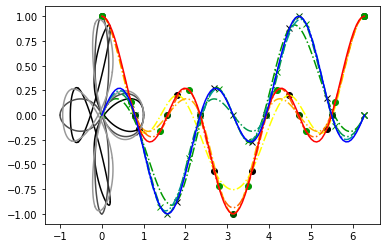

In [11]:

n = 10
a = 0.
b = 2.*np.pi

ALPHA = 1
KAPPA = 2

def solve_moments2(h, f, derivf0, derivfn):
    '''
    Solve moments with exercise07's borders
    '''
    linequation = np.zeros((len(h)+1,len(h)+1))
    rightside = np.zeros(len(h)+1)
    offset = 1
    for i in range(1,len(h)):
        li = 0
        hi = h[i-1]
        hip = h[i]
        linequation[i][offset] = 2
        li = hip/(hi+hip)
        di = 6/(hi+hip) * ( (f[i+1]-f[i])/hip - (f[i]-f[i-1])/hi )
        linequation[i][offset+1] = li
        linequation[i][offset-1] = 1-li
        rightside[i] = di
        offset += 1
    d0 = (6/h[0])*((f[1]-f[0])/h[0]-derivf0)
    dn = (6/h[-1])*(derivfn - (f[-1]-f[-2])/h[-1])
    rightside[0] = d0
    rightside[-1] = dn
    linequation[0][0] = 2
    linequation[0][1] = 1
    linequation[-1][-1] = 2
    linequation[-1][-2] = 1
    return np.linalg.solve(linequation, rightside)

def s_i(mi, fi, hi, i):
    a0, a2 = fi[i+1], mi[i+1]/2
    a1 = (fi[i+1]-fi[i])/hi[i] + ( hi[i] * (2.0*mi[i+1] + mi[i]) )/6.0
    a3 = (mi[i+1] - mi[i]) / (6*hi[i])
    poly = np.polynomial.Polynomial((a0, a1, a2, a3))
    return poly

def func1(t):
    return ALPHA*math.cos(KAPPA*t)*math.cos(t)

def func2(t):
    return ALPHA*math.cos(KAPPA*t)*math.sin(t)

xvals = np.linspace(a,b,100)

for i in range(7,n):
    interppointsx = np.linspace(a,b,i+1)
    interppointsy1 = [func1(x) for x in interppointsx]
    interppointsy2 = [func2(x) for x in interppointsx]
    intervalsize = [(interppointsx[i+1] - interppointsx[i]) for i in range(len(interppointsx)-1)]

    yvals1 = [func1(x) for x in xvals]
    yvals2 = [func2(x) for x in xvals]

    moments1 = solve_moments2(intervalsize, interppointsy1, 0, 0)
    moments2 = solve_moments2(intervalsize, interppointsy2, 1, 1)
    interppolys1 = [s_i(moments1, interppointsy1, intervalsize, k) for k in range(i)]
    interppolys2 = [s_i(moments2, interppointsy2, intervalsize, k) for k in range(i)]

    plt.plot(interppointsx, interppointsy1, 'o', color=[0,0.3*(i-7),0])
    plt.plot(interppointsx, interppointsy2, 'x', color=[0,0.3*(i-7),0])

    for pindex in range(len(interppolys1)):
        poly1 = interppolys1[pindex]
        poly2 = interppolys2[pindex]
        _xvals = np.linspace(interppointsx[pindex], interppointsx[pindex+1], 30)
        xshift = np.linspace(-intervalsize[pindex], 0, 30)
        y1 = poly1(xshift)
        y2 = poly2(xshift)
        plt.plot(_xvals, y1, '-.', color=[1, 1-.3*(i-7),0])
        plt.plot(y1, y2, '-', color=[.3*(i-7), .3*(i-7), .3*(i-7)])
        plt.plot(_xvals, y2, '-.', color=[0, .6, .3*(i-7)])

plt.plot(xvals, yvals1, color=[1,0,0])
plt.plot(xvals, yvals2, color=[0,0,1])
plt.show()
